<a href="https://colab.research.google.com/github/HashanJayalath/Machine-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
from typing import Tuple

def load_dataset(
) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Load the dataset as a set of numpy arrays.
    Args:
    src_dir: Directory where dataset files are stored.
    Returns:
      (x_train, y_train, x_val, y_val, x_test) tuple where each array is one dimensional.
    """
    x_train=np.loadtxt('x_train.txt')
    y_train=np.loadtxt('y_train.txt')
    x_val=np.loadtxt('x_val.txt')
    y_val=np.loadtxt('y_val.txt')

    output=(x_train,y_train,x_val,y_val)

    return output

In [17]:
def get_features(x: np.ndarray, n: int) -> np.ndarray:
  """Creates n-th degree polynomial features for the given vector x.
  Example usage:
  get_features(np.array([1.0, 2.0, 3.0]), 3) outputs
  np.array([[ 1., 1., 1.],
            [ 2., 4., 8.],
            [ 3., 9., 27.]])
  Args:
    x: A numpy array of shape (num_examples, ) or (num_examples, 1).
    n: The degree of the polynomial features.
  Returns:
    A matrix of shape (num_examples, n) where the j-th column is equal to
    the vector x raised to the power j (elementwise).
  """
  s=[]
  for i in range(1,n+1):
    s.append(x**i)
  
  s=np.array(s)
  s=np.transpose(s)
  return s


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def fit_and_evaluate(
    x_train: np.ndarray, y_train: np.ndarray,
    x_val: np.ndarray, y_val: np.ndarray,
    n: int,x_test: np.ndarray
    ) -> Tuple[float, float]:
  """Fits an n-th degree polynomial and outputs train and validation MSE.
  Fits a linear regression model y = sum_{i=1}^n w_i x^i to the given train
  set and outputs the mean-squared-error (MSE) on train and validation sets.
  Args:
    x_train: Input features for the train set. Has shape (num_train, )
    y_train: Targets (labels) for the train set. Has shape (num_train, )
    x_val: Input features for the validation set. Has shape (num_val, )
    y_val: Targets (labels) for the validation set. Has shape (num_val, )
    n: The degree of the polynomial fit. See the above equation.
  Returns:
    (train_mse, val_mse), tuple of MSE on train and validation sets.
  """
  # Fit the model on the train set.
  features=get_features(x_train,n)
  w=LinearRegression().fit(features, y_train)
 
  # Generate model predictions for the train set and calculate the MSE.
  y_predict_train = w.predict(features)
  train_mse = mean_squared_error(y_train, y_predict_train)

  # Similarly, calculate the MSE on the val set.
  features_val=get_features(x_val,n)
  y_predict_val=w.predict(features_val)

  # Generate model predictions for x_text.txt
  features_test=get_features(x_test,n)
  y_predict_test=w.predict(features_test)

  #print(x_train)

  #print(y_predict_test)

  a_file = open("test.txt", "w")
  #for row in y_predict_test:
    #print(row)
  np.savetxt(a_file,y_predict_test)

  a_file.close()
  


  val_mse = mean_squared_error(y_val, y_predict_val)

  return train_mse, val_mse

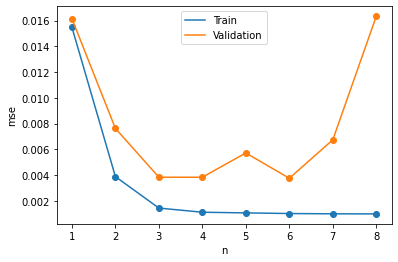

0.003744588228404576
5


In [27]:
from matplotlib import pyplot as plt

output=load_dataset()
x_axis=[1,2,3,4,5,6,7,8]
mse_train=[]
mse_val=[]
for n in range(1,9):
  l=fit_and_evaluate(output[0],output[1],output[2],output[3],n,np.loadtxt("x_test.txt"))
  mse_train.append(l[0])
  mse_val.append(l[1])

plt.scatter(x_axis, mse_train)
plt.plot(x_axis, mse_train)

plt.scatter(x_axis, mse_val)
plt.plot(x_axis, mse_val)

plt.xlabel("n")
plt.ylabel("mse")
plt.legend(["Train", "Validation"])
plt.show()


print(min(mse_val))
print(mse_val.index(min(mse_val)))

## **Predicting**

In [ ]:
fit_and_evaluate(output[0],output[1],output[2],output[3],6,np.loadtxt('x_test.txt'))

(0.0010010576027579198, 0.003744588228404576)